# Description:

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.
Data Dictionary
Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task
- Import data into R environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
The analysis results to be provided with insights wherever applicable.




EDA Performed by: Anik Chakraborty (waytoanik@outlook.com)

# EDA (Exploratory Data Analysis):

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

#Loading Data
df <- read.csv("../input/comcastcomplaints/comcast_fcc_complaints_2015.csv")
str(df)

'data.frame':	2225 obs. of  11 variables:
 $ Ticket..                   : Factor w/ 2225 levels "211255","211472",..: 371 124 307 611 849 1214 1763 1590 967 2111 ...
 $ Customer.Complaint         : Factor w/ 1842 levels "(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!",..: 307 1520 1661 499 647 1354 1716 712 447 696 ...
 $ Date                       : Factor w/ 92 levels "4/1/2015","4/10/2015",..: 15 29 10 59 49 65 78 77 62 83 ...
 $ Time                       : Factor w/ 2191 levels "1:00:18 AM","1:00:32 PM",..: 1198 291 2166 652 89 2190 252 1666 594 1648 ...
 $ Received.Via               : Factor w/ 1 level "Internet": 1 1 1 1 1 1 1 1 1 1 ...
 $ City                       : Factor w/ 928 levels "Abingdon","Acworth",..: 1 2 2 2 2 2 2 3 4 4 ...
 $ State                      : Factor w/ 43 levels "Alabama","Arizona",..: 19 11 11 11 11 11 11 21 4 4 ...
 $ Zip.code                   : int  21009 30102 30101 30101 30101 30101 30101 49221 94502 94501 ...
 $ Status      

Now preparing the data for further processing.
Checked if there is any NA value in the data frame?
There is no NA value present as output is 0


**Data Preparation:**

In [2]:
#checking if NA present
na_value <- is.na(df)
length(na_value[na_value==TRUE])

[1] 0

Date value is stored in data frame as character and is in different format. Converted it into Date with a specific format and stored into the same data frame as Date_new.


In [3]:
head(df$Date)

[1] 4/22/2015 4/8/2015  4/18/2015 5/7/2015  5/26/2015 6/12/2015
92 Levels: 4/1/2015 4/10/2015 4/11/2015 4/12/2015 4/13/2015 ... 6/9/2015

Formating date and storing in dataframe.

In [4]:
library(lubridate)
df$Date_new<- mdy(df$Date)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
head(df$Date_new)

[1] "2015-04-22" "2015-04-08" "2015-04-18" "2015-05-07" "2015-05-26"
[6] "2015-06-12"

Checking if we have data of single year or multiple years. And the answer is yes, It's only 2015. Storing Months number in df$month from df$Data_new.

In [6]:
unique(as.integer(year(df$Date_new)))

[1] 2015

In [7]:
df$month = as.integer(month(df$Date_new))

Now, Calculating Daily and Monthly number of complaints.

In [8]:
library(dplyr)
count_d <- summarise(group_by(df, Date_new), Count = n())
count_m <- summarise(group_by(df, month), Count = n())


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



In [9]:
count_d
count_m

Date_new,Count
<date>,<int>
2015-04-01,18
2015-04-02,27
2015-04-03,15
2015-04-04,12
2015-04-05,6
2015-04-06,13
2015-04-07,25
2015-04-08,28
2015-04-09,21


month,Count
<int>,<int>
4,545
5,399
6,1281


Creating Monthly trend chart for number of complains.

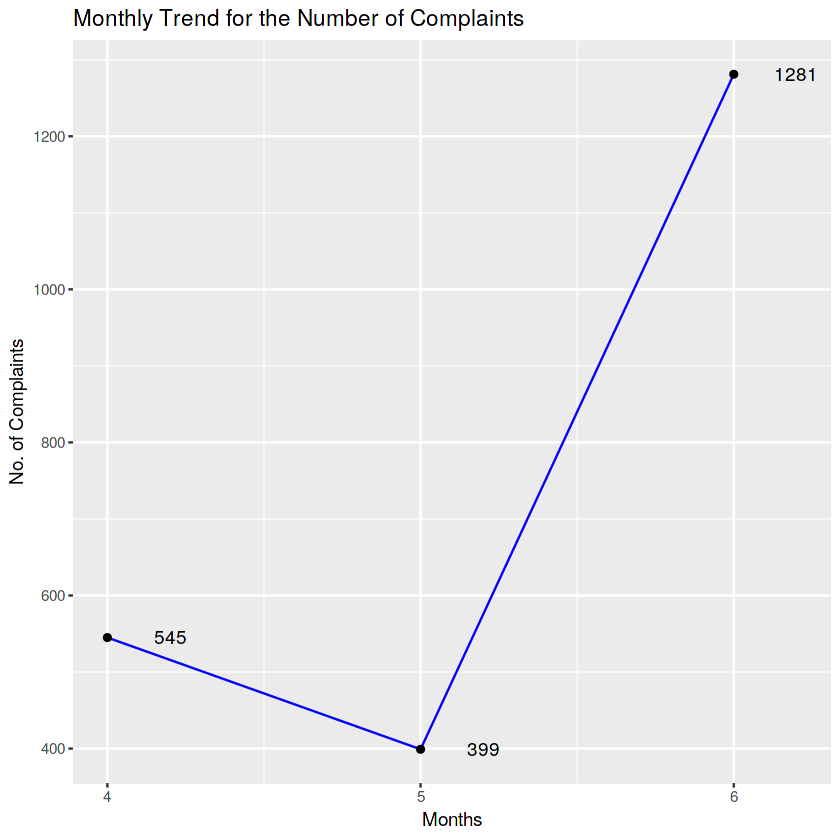

In [10]:
library(ggplot2)
ggplot(data = count_m, aes(x= month, y= Count))+
  geom_line(color="blue")+
  geom_point()+
  geom_text(label= count_m$Count, nudge_x = 0.2, nudge_y = 0.3, check_overlap = T)+
  scale_x_continuous(breaks = count_m$month)+
  labs(title = "Monthly Trend for the Number of Complaints",x= "Months",y ="No. of Complaints")

It can be observed that In June number of complaints are comparatively higher than in other months. In June probably there was some major issue because of that number of complaints reached the highest number.

Creating Daily trend chart for number of complains.

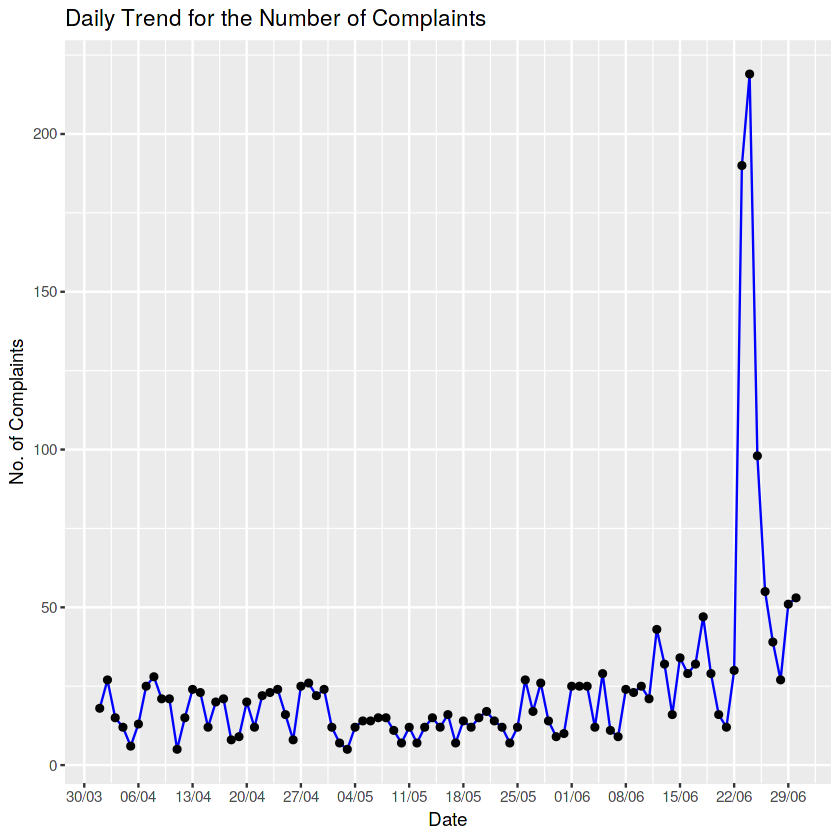

In [11]:
#Daily trend chart for the number of complaints 
ggplot(data = count_d, aes(x= as.POSIXct(Date_new), y= Count))+
  geom_line(color="blue")+
  geom_point()+
  scale_x_datetime(breaks = "1 weeks", date_labels = "%d/%m")+
  theme(axis.text.x = element_text(angle = 0))+
  labs(title = "Daily Trend for the Number of Complaints", x = "Date", y ="No. of Complaints")

In the daily chart of complaints, it can be seen that cmpains are higher between 12th June and 30th June. To be more precise on 23rd, 24th and 25th June there are sudden spikes of daily complaints, there could be some major reason behind that. We will do further analysis below.

Now, calculating frequency of different types of complaints. To do so first we are using NLP to get the highest frequency words/tags that appeared in Customer.Complaint
To do so I have converted Customer.Complaint column into a corpus (collection of documents). Then removed punctuation, converted everything to lowercase.
After that I have removed all stop words and also the word “comcast” (as “comcast” is the company name and is appearing in most of the complaints text).
Then performed stemming and removed whitespaces.

**Frequency of complaint types Calculation:**


In [12]:
#using NLP to get highest frequency words
library(tm)
library(SnowballC)
corp_com = Corpus(VectorSource(df$Customer.Complaint))

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content




In [13]:
#remove punctuations
corp_com <- tm_map(corp_com, removePunctuation)
#to lowercase
corp_com <- tm_map(corp_com, PlainTextDocument)
corp_com <- tm_map(corp_com, tolower)
#remove stopwords and the word "comcast"
corp_com <- tm_map(corp_com, removeWords, c("comcast", stopwords("english")))

Warning message in tm_map.SimpleCorpus(corp_com, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp_com, PlainTextDocument):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp_com, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp_com, removeWords, c("comcast", stopwords("english"))):
“transformation drops documents”


Created termed document matrix and stored the frequency of the tags/words into df1 dataframe. Displaying top 25 tags/words.

In [14]:
#creating term document matrix and calculating tags frequency
m <- TermDocumentMatrix(corp_com)
mat <- as.matrix(m)
f <- sort(rowSums(mat),decreasing=TRUE)
df1 <- data.frame(word = names(f),freq=f)
head(df1, 25)

,word,freq
,<fct>,<dbl>
internet,internet,517
service,service,444
billing,billing,282
data,data,220
speed,speed,116
cap,cap,103
issues,issues,90
customer,customer,88
caps,caps,79


From above tags and their frequency, I have derived complain types. Now, getting the index of df$Customer.Complaint rows that contain below match words (in case insensitive form).

**Deriving complain types:**

In [15]:
internet <- contains(df$Customer.Complaint, match = 'internet',ignore.case = T)
billing <- contains(df$Customer.Complaint, match = 'bill',ignore.case = T)
data <- contains(df$Customer.Complaint, match = 'data',ignore.case = T)
cap <- contains(df$Customer.Complaint, match = 'cap',ignore.case = T)
throttle <- contains(df$Customer.Complaint, match = 'throttl',ignore.case = T)
price <- contains(df$Customer.Complaint, match = 'price',ignore.case = T)
charge <- contains(df$Customer.Complaint, match = 'charge',ignore.case = T)
cable <- contains(df$Customer.Complaint, match = 'cable',ignore.case = T)
connect <- contains(df$Customer.Complaint, match = 'connect',ignore.case = T)
contract <- contains(df$Customer.Complaint, match = 'contract',ignore.case = T)
account <- contains(df$Customer.Complaint, match = 'account',ignore.case = T)
email <- contains(df$Customer.Complaint, match = 'email',ignore.case = T)
xfinity <- contains(df$Customer.Complaint, match = 'xfinit',ignore.case = T)
hbo <- contains(df$Customer.Complaint, match = 'hbo',ignore.case = T)
modem <- contains(df$Customer.Complaint, match = 'modem',ignore.case = T)
service <- contains(df$Customer.Complaint, match = 'service',ignore.case = T)

Complaint.Types column has been created. Initially all values in  Complaint.Types is NA. 

Internet has the highest tag frequency. Now, assigning category “Internet” to the rows of df$Complaint.Types having the same indexes that we have derived in last step.

Second one having high frequency is “billing”. Now it may happen that, internet and billing may have some common indexes. To avoid that, I have decided that if one complaint is already assigned to a category then it will not be changed anymore. So below it can be seen that for “billing” we have assigned category= Billing to only those rows whose indexes are present in billing and existing value is NA.

We have set all the category tags frequency wise. Then applied above technique for all  identified category tags.


**Creating new column and adding complaint type serially:**

In [16]:
df$Complaint.Types[internet] <- "Internet"
df$Complaint.Types[billing] <- ifelse(is.na(df$Complaint.Types[billing]),"Billing",df$Complaint.Types[billing])
df$Complaint.Types[data] <- ifelse(is.na(df$Complaint.Types[data]),"Data",df$Complaint.Types[data])
df$Complaint.Types[cap] <- ifelse(is.na(df$Complaint.Types[cap]),"Usage Cap",df$Complaint.Types[cap])
df$Complaint.Types[throttle] <- ifelse(is.na(df$Complaint.Types[throttle]),"Throttling",df$Complaint.Types[throttle])
df$Complaint.Types[price] <- ifelse(is.na(df$Complaint.Types[price]),"Price",df$Complaint.Types[price])
df$Complaint.Types[charge] <- ifelse(is.na(df$Complaint.Types[charge]),"Charges",df$Complaint.Types[charge])
df$Complaint.Types[cable] <- ifelse(is.na(df$Complaint.Types[cable]),"Cable",df$Complaint.Types[cable])
df$Complaint.Types[connect] <- ifelse(is.na(df$Complaint.Types[connect]),"Connect",df$Complaint.Types[connect])
df$Complaint.Types[contract] <- ifelse(is.na(df$Complaint.Types[contract]),"Contract",df$Complaint.Types[contract])
df$Complaint.Types[account] <- ifelse(is.na(df$Complaint.Types[account]),"Account",df$Complaint.Types[account])
df$Complaint.Types[email] <- ifelse(is.na(df$Complaint.Types[email]),"Email",df$Complaint.Types[email])
df$Complaint.Types[xfinity] <- ifelse(is.na(df$Complaint.Types[xfinity]),"Xfinity",df$Complaint.Types[xfinity])
df$Complaint.Types[hbo] <- ifelse(is.na(df$Complaint.Types[hbo]),"HBO",df$Complaint.Types[hbo])

Now assigning Type= Others to rest of the complaints. This Others complains are very important to study. Above it can be seen that there are 16 Categories identified. Initially number of categories were lesser than that. Those incidents were part of Others category. Then I have checked if there are any such incident type that has multiple incidents and those are in Others category. A new tag/category has been created for such incidents. It is an iterative process. Thus number of incident categories have been increases and number of complaints/incidents in Others category reduced.

In [17]:
#assigning "Others" for rest of the complaints
df$Complaint.Types[-c(internet,billing,data,cap,throttle,price,charge,cable,connect,contract,account,email,xfinity,hbo,modem,service)]<- "Others"

In [18]:
#final table with the frequency of all complaint types
table(df$Complaint.Types)


   Account    Billing      Cable    Charges    Connect   Contract       Data 
        17        334         23         97         21         22        197 
     Email        HBO   Internet     Others      Price Throttling  Usage Cap 
        12         25        532        560         36         41         15 
   Xfinity 
        62 

**Most of the complaints belong to Internet issues.**

**Creating df$complaint_status to store status Open or Closed:**

In [19]:
#new categorical variable with value as Open and Closed
open_complaints <- (df$Status == "Open" | df$Status == "Pending")
closed_complaints <- (df$Status == "Closed" | df$Status == "Solved")
df$complaint_status[open_complaints] <- "Open" 
df$complaint_status[closed_complaints] <- "Closed"

Deriving state wise status of complaints. It can be seen that few states are in upper-lower case mix in  State (e.g. District of Columbia and District Of Columbia both are present). To fix that issue I have created  state_lower by converting all state names in lowercase.

In [20]:
#Statewise status of complains
#few states are in upper-lower case mix (e.g. District of Columbia)
df$state_lower <- tolower(df$State)

**Creating state wise status of complaints in a stacked bar chart:**

`summarise()` regrouping output by 'state_lower' (override with `.groups` argument)



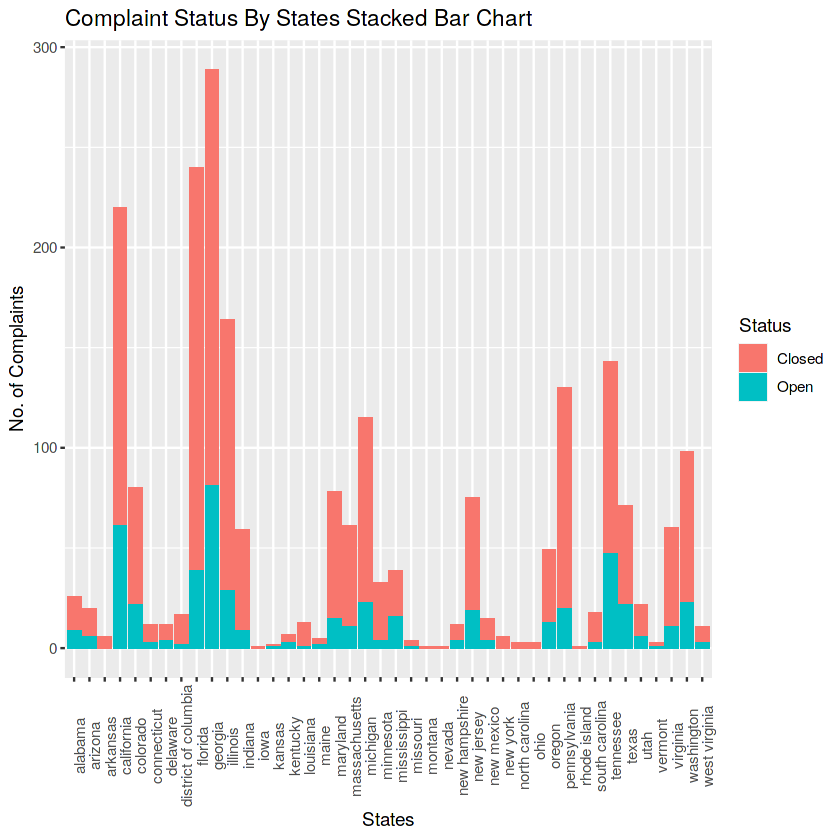

In [21]:
#plot
count_states <- summarise(group_by(df, state_lower, complaint_status), Count = n())
ggplot(as.data.frame(count_states), aes(x = state_lower, y = Count))+
  geom_col(aes(fill = complaint_status))+
  theme(axis.text.x = element_text(angle = 90))+
  labs(title = "Complaint Status By States Stacked Bar Chart", x = "States", y = "No. of Complaints", fill= "Status")

**Identifying the state that has maximum number of complaints (Open + Closed):**

In [22]:
#State having the maximum complaints (total)
max_comp <- arrange(summarise(group_by(df, state_lower), Count = n()), desc(Count))
max_comp[1,]

`summarise()` ungrouping output (override with `.groups` argument)



state_lower,Count
<chr>,<int>
georgia,289


State having the maximum number of complaints (Open + Closed) is Georgia, having 289 complaints.

**Now, Identifying the state that has maximum number of Open complaints:**

In [23]:
#State having the maximum Open complaints
max_open_comp <- arrange(summarise(group_by(filter(df, complaint_status == "Open"), state_lower), Count = n()), desc(Count))
max_open_comp[1,]

`summarise()` ungrouping output (override with `.groups` argument)



state_lower,Count
<chr>,<int>
georgia,81


State having the maximum number of Open complaints is Georgia, having 81 Open complaints.

**Identifying the state having the highest percentage of unresolved complaints:**

In [24]:
#State having the highest percentage of unresolved complaints
count_by_states <- merge(x = max_comp, y = max_open_comp, by = "state_lower", all.x = TRUE)
count_by_states$Count.y <- ifelse(is.na(count_by_states$Count.y),0,count_by_states$Count.y)
count_by_states <- cbind(count_by_states, "% unresolved" = count_by_states$Count.y / count_by_states$Count.x * 100)
count_by_states <- arrange(count_by_states, desc(count_by_states["% unresolved"]))
count_by_states[1,]

,state_lower,Count.x,Count.y,% unresolved
,<chr>,<int>,<dbl>,<dbl>
1,kansas,2,1,50


State having the highest percentage of unresolved complaints is Kansas. It has 2 total complaints out of which 1 is unresolved. So, it’s 50%.

In [25]:
#percentage of complaints resolved till date, received through the Internet and customer care calls
levels(as.factor(df$Received.Via))
df2 <- table(df$Received.Via, df$complaint_status)
df2 <- cbind(df2, Total = rowSums(df2))
df2

[1] "Internet"

,Closed,Open,Total
Internet,1707,518,2225


**Calculating and plotting total Closed and Open Complaints percentage:**

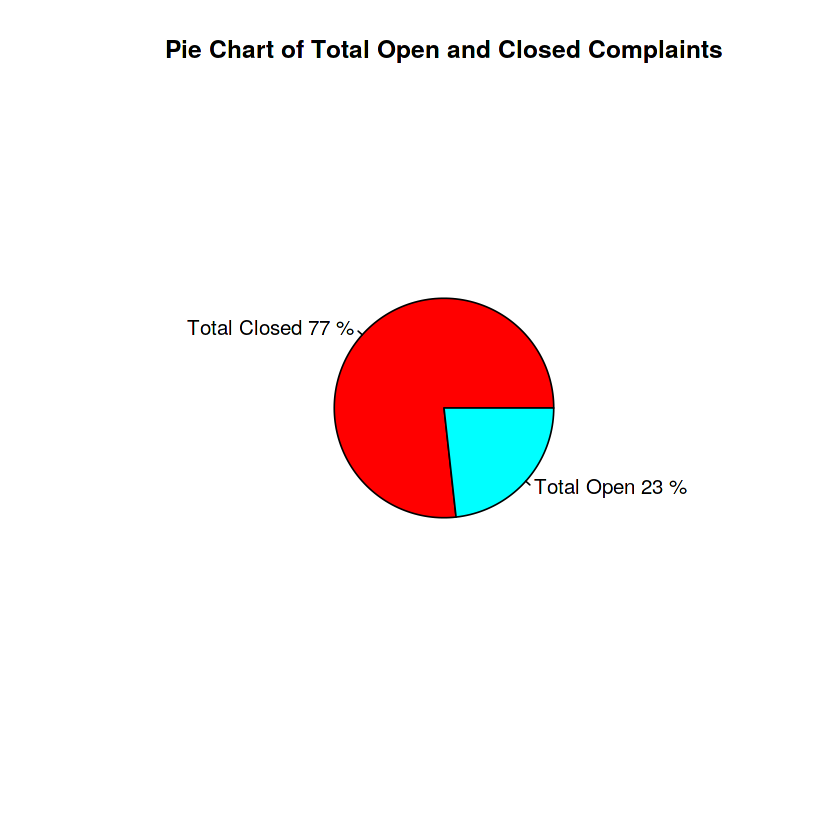

In [26]:
# Pie Chart for Total Closed and Open Complaints
slices <- c(1707, 517)
names <- c("Total Closed", "Total Open")
slices_per <- round(slices/sum(slices)*100)
slices_per <- as.character(slices_per)
slices_names_per <- paste(names, slices_per,"%")
pie(x=slices,labels = slices_names_per, col=rainbow(length(names)),
    main="Pie Chart of Total Open and Closed Complaints")

**Calculating and plotting Closed and Open Complaints received via Customer Care Calls:**

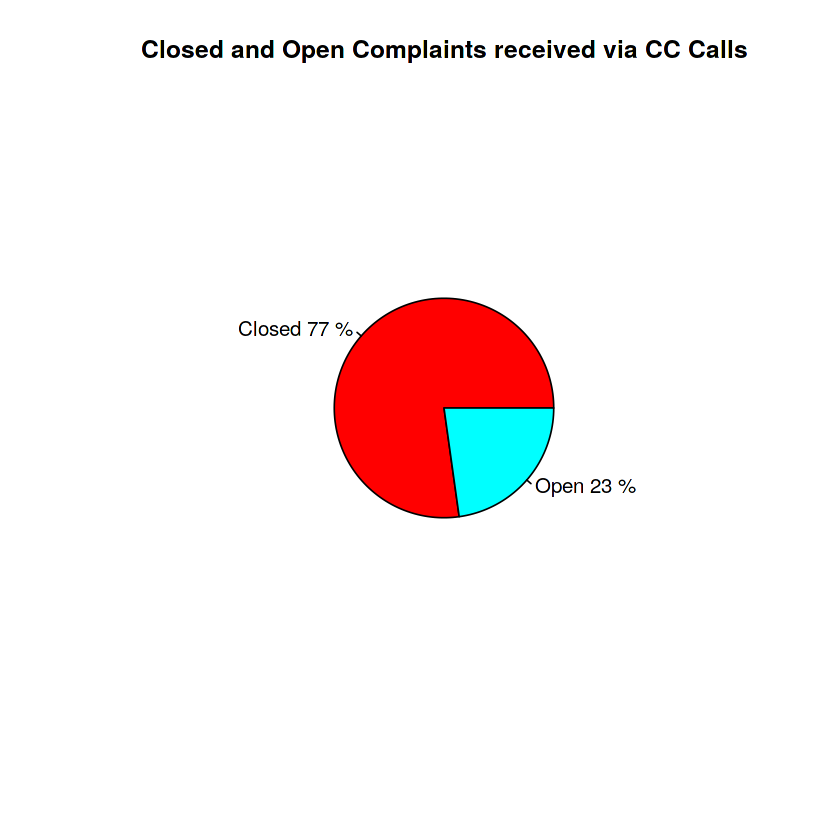

In [27]:
# Pie Chart for Closed and Open Complaints received via Customer Care Calls
slices1 <- c(864, 255)
names1 <- c("Closed", "Open")
slices_per1 <- round(slices1/sum(slices1)*100)
slices_per1 <- as.character(slices_per1)
slices_names_per1 <- paste(names1, slices_per1,"%")
pie(x=slices1,labels = slices_names_per1, col=rainbow(length(names1)),
    main="Closed and Open Complaints received via CC Calls")

**Calculating and plotting Closed and Open Complaints received via Internet:**

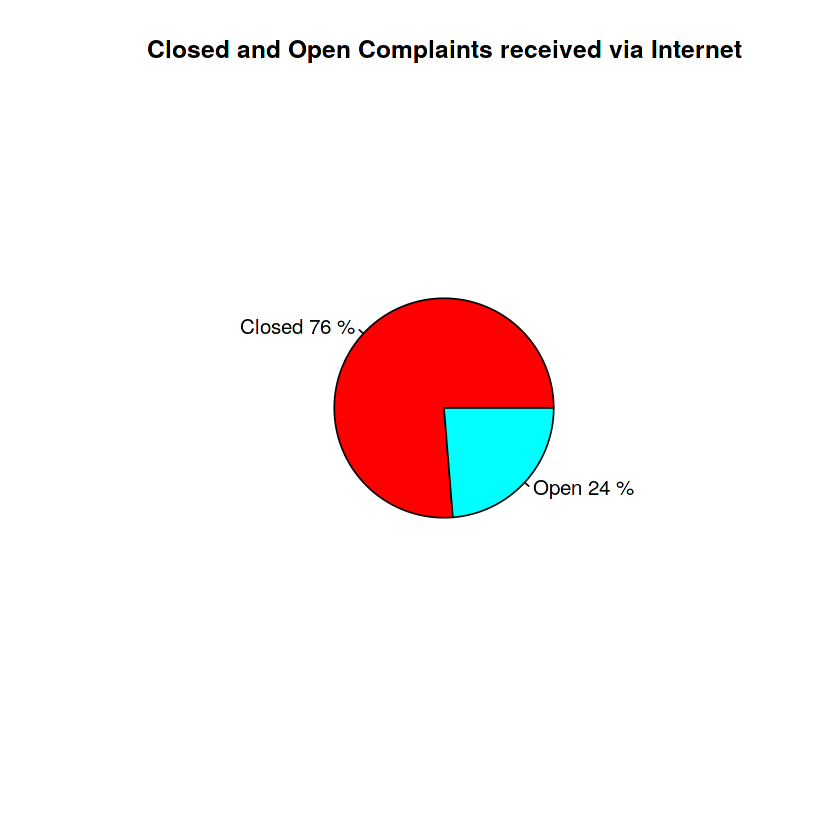

In [28]:
# Pie Chart for Closed and Open Complaints received via Internet
slices2 <- c(843, 262)
names2 <- c("Closed", "Open")
slices_per2 <- round(slices2/sum(slices2)*100)
slices_per2 <- as.character(slices_per2)
slices_names_per2 <- paste(names2, slices_per2,"%")
pie(x=slices2,labels = slices_names_per2, col=rainbow(length(names2)),
    main="Closed and Open Complaints received via Internet")

**Calculating and plotting All Closed Complaints that are received via Internet and received via Customer Care Calls:**

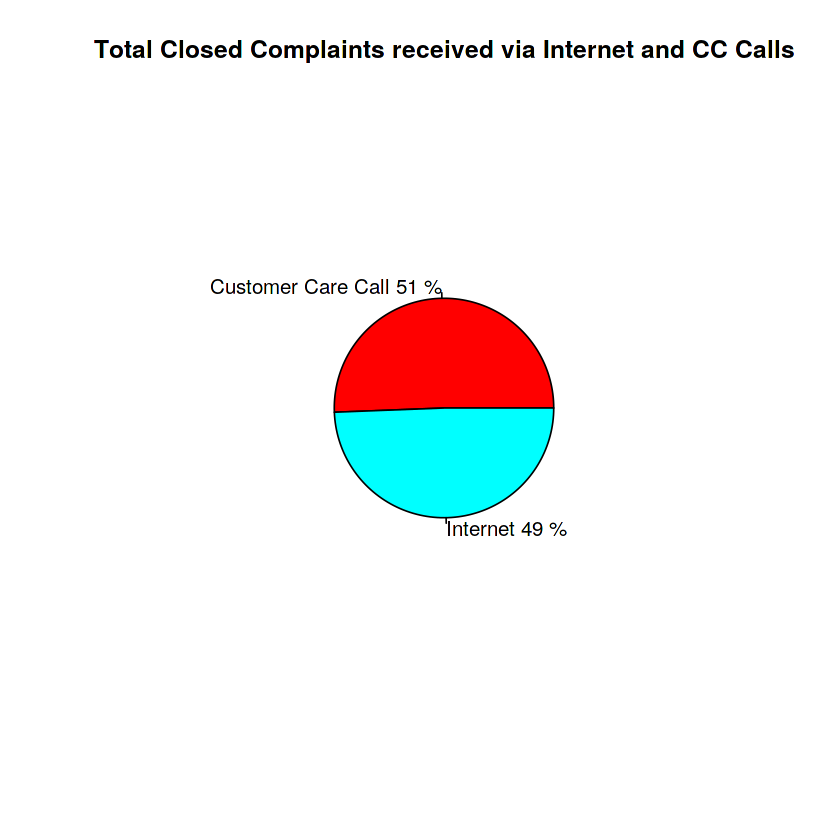

In [29]:
# Pie Chart for Total Closed Complaints received via Internet and Customer Care Call
slices3 <- c(864, 843)
names3 <- c("Customer Care Call", "Internet")
slices_per3 <- round(slices3/sum(slices3)*100)
slices_per3 <- as.character(slices_per3)
slices_names_per3 <- paste(names3, slices_per3,"%")
pie(x=slices3,labels = slices_names_per3, col=rainbow(length(names3)),
    main="Total Closed Complaints received via Internet and CC Calls")

From the Pie chart above it can be seen that Total Resolved complaints is 77% and total Unresolved complaints is 23%.
For Complaints, received via Customer Care Call, 77% are Closed and 23% are Open.
For Complaints, received via the Internet 76% are Closed and 24% are Open.
For all complaints which are Resolved/Closed, 51% of those were received via Customer Care Call and the rest of 49% were received via Internet.


# Insights:

* According to the above analysis, it can be seen that complaints are higher between 12th June and 30th June. To be more precise on 23rd, 24th and 25th June there are sudden spikes of daily complaints. 
* Most of these complaints are related to Internet Service and Billing related issues. Few other major complaints are related to Data, Usage Caps, Speed Throttling and Charges related. 
* Highest amount of complaints has been received from Georgia. It also has the highest number of Open complaints.
* For Complaints, received via Customer Care Call, 77% are Closed and 23% are Open.
* For Complaints, received via the Internet 76% are Closed and 24% are Open. 
* It can be concluded that there is no discrepancy in resolving complaints between complaints logged via Customer Care call and logged via Internet. 
* Out of all complaints 77% are already closed and 23% complaints are still open.